In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Select only the numeric columns for normalization
numeric_columns = market_data_df.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler to the selected numeric columns and transform the data
market_data_df[numeric_columns] = scaler.fit_transform(market_data_df[numeric_columns])

# Display the first 10 rows of the DataFrame with normalized data
market_data_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [10]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data

# Import necessary library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Select only the numeric columns for normalization
numeric_columns = market_data_df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame with scaled data
scaled_data = scaler.fit_transform(market_data_df[numeric_columns])

# Create a new DataFrame with the scaled data, using the same index and columns
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=numeric_columns)

# Ensure 'coinid' is present in the original DataFrame before copying
if 'coinid' in market_data_df.columns:
    # Copy the crypto names from the original data
    scaled_df['crypto_name'] = market_data_df['crypto_name']

    # Set the "coinid" column as the index
    scaled_df.set_index('coinid', inplace=True)

# Display sample data
scaled_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame

# Import necessary library
from sklearn.cluster import KMeans

# Create a list with the number of k-values to try (range from 1 to 11)
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans_model.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,66.099188
5,6,54.142735
6,7,43.219959
7,8,37.304991
8,9,32.485241
9,10,29.237509


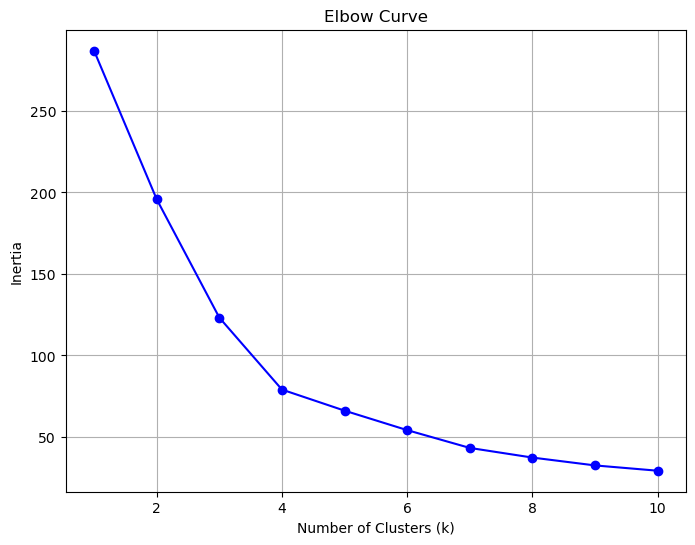

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Import necessary libraries
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**k=3

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [15]:
# Initialize the K-Means model using the best value for k

# Import necessary library
from sklearn.cluster import KMeans

# Choose the optimal value for k based on the Elbow Curve analysis
optimal_k = 3 # replace with the optimal k value you identified

# Create a KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the original scaled data
clusters = kmeans_model.fit_predict(scaled_df)

# Add a 'Cluster' column to the DataFrame to store cluster assignments
scaled_df['Cluster'] = clusters

# Display the DataFrame with the added 'Cluster' column
scaled_df.head(10)



C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,1


In [16]:
# Fit the K-Means model using the scaled data
# Fit the K-Means model to the scaled data
kmeans_model.fit(scaled_df)

# Get cluster assignments for each data point
clusters = kmeans_model.labels_

# Add a 'Cluster' column to the DataFrame to store cluster assignments
scaled_df['Cluster'] = clusters

# Display the DataFrame with the added 'Cluster' column
scaled_df.head(10)


C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,1


In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data


# View the resulting array of cluster values.
# Predict the clusters for the scaled data
predicted_clusters = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values
print(predicted_clusters)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [18]:

# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()


In [19]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data
# Add a new column 'Predicted_Cluster' with the predicted clusters to the copied DataFrame
scaled_df_copy['Predicted_Cluster'] = predicted_clusters

# Display sample data from the copied DataFrame
scaled_df_copy.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,Predicted_Cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1,1
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,1,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1,1
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1,1
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,1,1


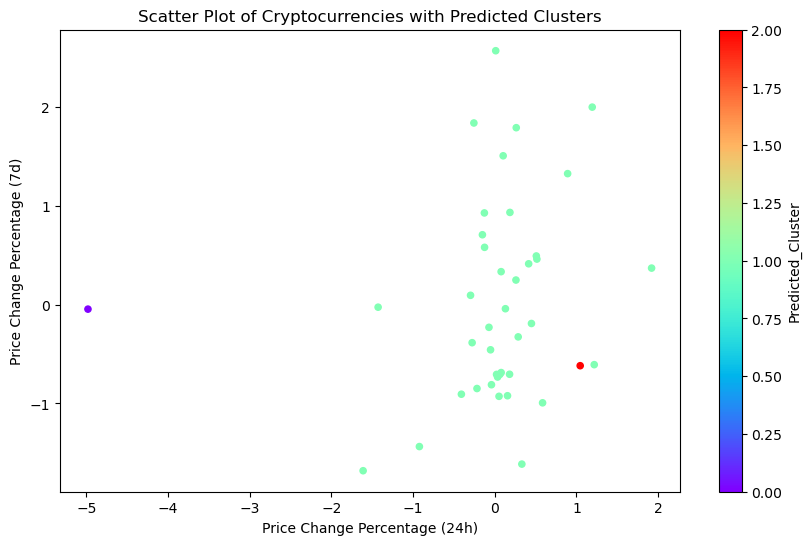

In [20]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a scatter plot using Pandas plot
scaled_df_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="Predicted_Cluster", colormap="rainbow", figsize=(10, 6))

# Set plot labels and title
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Scatter Plot of Cryptocurrencies with Predicted Clusters")

# Show the plot
plt.show()




### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
# Import necessary library
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)



In [22]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.


# View the first five rows of the DataFrame. 
# Fit and transform the original scaled DataFrame using the PCA model
pca_result = pca_model.fit_transform(scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'], index=scaled_df.index)

# Display the first five rows of the DataFrame
pca_df.head()



,PCA_Component_1,PCA_Component_2,PCA_Component_3
coin_id,,,
bitcoin,-0.643635,0.797638,0.478344
ethereum,-0.479406,0.420074,0.959941
tether,-0.424794,-0.186281,-0.640077
ripple,-0.460122,-0.243957,-0.479051
bitcoin-cash,-1.260462,1.942501,1.895926


In [23]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# Retrieve the explained variance from the PCA model
explained_variance_ratio = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f'Explained Variance for PCA_Component_{i}: {ratio:.2%}')


Explained Variance for PCA_Component_1: 36.98%
Explained Variance for PCA_Component_2: 34.85%
Explained Variance for PCA_Component_3: 17.61%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 89.44%.

In [27]:
# Creating a DataFrame with the PCA data
pca_data_df = pd.DataFrame(data=pca_result, columns=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'], index=scaled_df.index)

# Check if 'crypto_name' is present in the original DataFrame
if 'crypto_name' in scaled_df.columns:
    # Copy the crypto names from the original data
    pca_data_df['crypto_name'] = scaled_df['crypto_name']
    
# Set the index of pca_data_df to 'coinid' if available, otherwise use the existing index
if 'coinid' in scaled_df.columns:
    pca_data_df.set_index('coinid', inplace=True)

# Display sample data
pca_data_df.head()


,PCA_Component_1,PCA_Component_2,PCA_Component_3
coin_id,,,
bitcoin,-0.643635,0.797638,0.478344
ethereum,-0.479406,0.420074,0.959941
tether,-0.424794,-0.186281,-0.640077
ripple,-0.460122,-0.243957,-0.479051
bitcoin-cash,-1.260462,1.942501,1.895926


### Find the Best Value for k Using the PCA Data

In [28]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame

# Create a list with the number of k-values to try (range from 1 to 11)
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using PCA DataFrame
    kmeans_model.fit(pca_data_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

,k_values,inertia_values
0,1,258.489643
1,2,167.517428
2,3,93.456492
3,4,49.349182
4,5,37.577423
5,6,30.513602
6,7,20.944165
7,8,16.933423
8,9,13.556333
9,10,10.551905


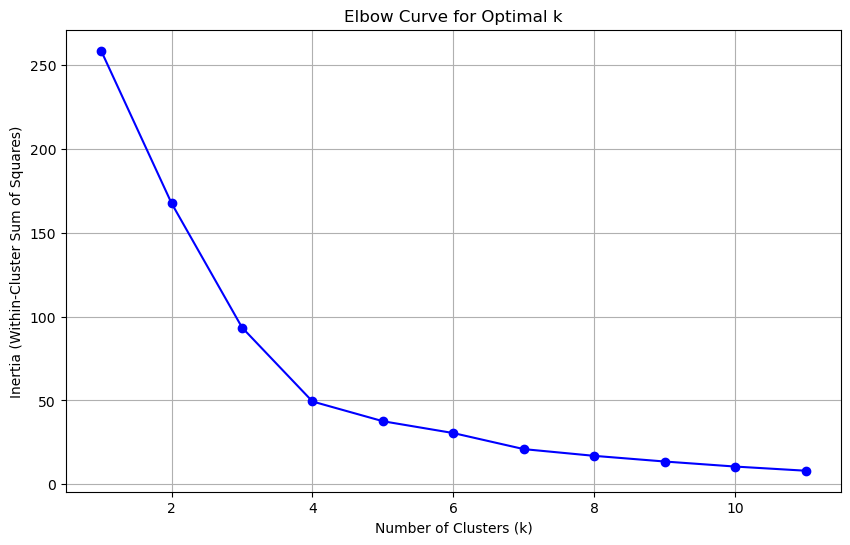

In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
he best value for k when using PCA data is similarly determined by the "elbow method", where we look for the point on the curve where the decrease in inertia begins to level off. Based on the second uploaded Elbow Curve graph, the best value for k appears to be at the same point where the rate of decrease in inertia becomes more gradual. This seems to be at k = 3 as well, since after this point, the inertia curve starts to flatten out.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Since the best value for k in both the original data (based on the first graph provided) and the PCA data (based on the second graph provided) is 3, there is no difference in the best k value between the original data and the PCA data. Both methods suggest that the optimal number of clusters for the data is 3.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [30]:
# Initialize the K-Means model using the best value for k
# Assuming you have the best value for k
best_k = 3 # Replace this with the actual optimal value obtained from the elbow method

# Initialize the K-Means model using the best value for k
best_kmeans_model = KMeans(n_clusters=best_k, random_state=42)

# Fit the K-Means model to the PCA data
best_kmeans_model.fit(pca_data_df)


C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [31]:
# Fit the K-Means model using the PCA data
# Fit the K-Means model to the PCA data
best_kmeans_model.fit(pca_data_df)

# Get the cluster assignments
cluster_assignments = best_kmeans_model.predict(pca_data_df)


C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veddy\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
# Predict the clusters to group the cryptocurrencies using the PCA data


# Print the resulting array of cluster values.
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = best_kmeans_model.predict(pca_data_df)

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [33]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
# Create a copy of the DataFrame with the PCA data
clustered_pca_data_df = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_data_df['Predicted_Cluster'] = predicted_clusters

# Display sample data
clustered_pca_data_df.head()



,PCA_Component_1,PCA_Component_2,PCA_Component_3,Predicted_Cluster
coin_id,,,,
bitcoin,-0.643635,0.797638,0.478344,0
ethereum,-0.479406,0.420074,0.959941,0
tether,-0.424794,-0.186281,-0.640077,0
ripple,-0.460122,-0.243957,-0.479051,0
bitcoin-cash,-1.260462,1.942501,1.895926,0


In [38]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
!pip install hvplot


In [55]:
import hvplot.pandas  # Import hvPlot for Pandas

# Assuming clustered_pca_data_df is the DataFrame with PCA data and predicted clusters
scatter_plot = clustered_pca_data_df.hvplot.scatter(
    x='PCA_Component_1', 
    y='PCA_Component_2', 
    c='Predicted_Cluster', 
    colormap='viridis', 
    hover_cols=['crypto_name']
)

# Show the plot
scatter_plot


:Scatter   [PCA_Component_1]   (PCA_Component_2,Predicted_Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [47]:
# Use the columns from the original scaled DataFrame as the index.
# Add a new identifier column
clustered_pca_data_df['New_Coin_ID'] = range(1, len(clustered_pca_data_df) + 1)

# Set the new identifier column as the index
clustered_pca_data_df.set_index('New_Coin_ID', inplace=True)

# Display the DataFrame with the updated index
clustered_pca_data_df.head()



,PCA_Component_1,PCA_Component_2,PCA_Component_3,Predicted_Cluster
New_Coin_ID,,,,
1,-0.643635,0.797638,0.478344,0
2,-0.479406,0.420074,0.959941,0
3,-0.424794,-0.186281,-0.640077,0
4,-0.460122,-0.243957,-0.479051,0
5,-1.260462,1.942501,1.895926,0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 	PCA_Component_1:

Strong negative influences: price_change_percentage_24h, price_change_percentage_7d, price_change_percentage_14d.
Strong positive influences: price_change_percentage_30d, price_change_percentage_60d, price_change_percentage_200d, price_change_percentage_1y.
PCA_Component_2:

Strong positive influences: price_change_percentage_24h, price_change_percentage_7d, price_change_percentage_14d, price_change_percentage_30d, price_change_percentage_60d.
Moderate positive influences: price_change_percentage_200d.
Weak negative influence: price_change_percentage_1y.
PCA_Component_3:

Strong negative influence: price_change_percentage_24h.
Strong positive influence: price_change_percentage_7d.

In [54]:
# Fit the PCA model to your data
pca_model.fit(scaled_df)

# Get the feature contributions to each principal component
feature_contributions = pca_model.components_

# Create a DataFrame to display the feature contributions
feature_contributions_df = pd.DataFrame(feature_contributions, columns=scaled_df.columns, index=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'])

# Display the DataFrame
feature_contributions_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
PCA_Component_1,-0.435784,-0.112312,-0.037326,0.160030,0.295328,0.591673,0.576031,-0.036982
PCA_Component_2,0.333334,0.212784,0.532568,0.571248,0.452173,0.061893,-0.119142,0.105701
PCA_Component_3,-0.209261,0.789372,0.358488,-0.172603,-0.352961,0.036549,0.204860,-0.083134
